In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


In [2]:
df = pd.read_csv('data/amz_uk_price_prediction_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
df['category'] = df['category'].replace(
    'Handmade Clothing, Shoes & Accessories', 'Fashion (hm)'
)

In [7]:
# Generate a frequency table for the product category
freq_table = (
    df.groupby('category')
    .size()
    .sort_values(ascending=False)
)
freq_table

category
Sports & Outdoors                 836265
Beauty                             19312
Fashion (hm)                       19229
Bath & Body                        19092
Birthday Gifts                     18978
                                   ...  
Motorbike Chassis                    107
Plugs                                107
Alexa Built-In Devices               107
Smart Home Security & Lighting       104
Smart Speakers                        54
Length: 296, dtype: int64

In [8]:
# Which are the top 5 most listed product categories?
top5 = freq_table.head(5)
top5

category
Sports & Outdoors    836265
Beauty                19312
Fashion (hm)          19229
Bath & Body           19092
Birthday Gifts        18978
dtype: int64

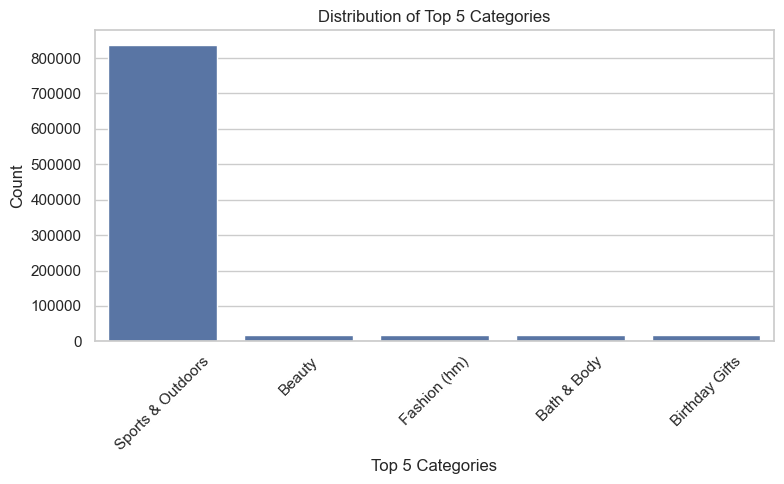

In [30]:
# Display the distribution of products across different categories using a bar chart. 
plt.figure(figsize=(8,5))

sns.barplot(
    data=top5    
)

plt.xlabel("Top 5 Categories")
plt.ylabel("Count")
plt.xticks(
    # ticks=RANGE_OR_POSITIONS,
    # labels=LABELS,
    rotation=45
)
plt.title("Distribution of Top 5 Categories")

plt.tight_layout()
plt.show()

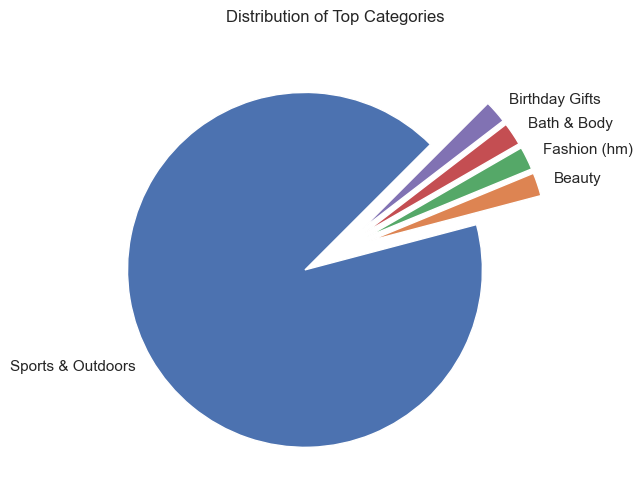

In [29]:
plt.figure(figsize=(8,5))
explode = [0.2] + [0.2] * (len(top5) - 1)

plt.pie(
    x = top5,
    labels=top5.index,
    # autopct="%1.1f%%",
    explode=explode,
    startangle=45,
    wedgeprops={"edgecolor": "white", "linewidth": 1}
)

plt.title("Distribution of Top Categories")

plt.tight_layout()
plt.show()
